In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Recreated data from the image
cores = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
execution_times = np.array([
    4.52154, 2.05317, 1.47584, 1.03565, 1.00601, 0.718886,
    0.796677, 0.839686, 0.78654, 0.785686, 0.721863, 0.733553,
    0.821222, 0.712032
])

# Calculate Speedup
T1 = execution_times[0]  # Time on 1 core
speedup = T1 / execution_times

# Calculate Efficiency
efficiency = speedup / cores

# Plot Execution Time vs. Number of Cores
plt.figure(figsize=(8, 5))
plt.plot(cores, execution_times, marker='o', linestyle='-', color='#102C53', label='Execution Time')
plt.xlabel('Number of Cores')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs. Number of Cores (50 x 50 x 50 grid)')
plt.grid(True)
plt.legend()
plt.show()

# Compute Theoretical Speedup Using the Given Formula
s = 0.075  # Serial fraction (adjustable parameter)
p = 0.925  # Parallel efficiency factor (adjustable parameter)

def theoretical_speedup(N, s, p):
    return 1 / (s + p / N)

theoretical_speedup_curve = np.array([theoretical_speedup(N, s, p) for N in cores])

# Plot Speedup vs. Number of Cores (Only)
plt.figure(figsize=(8, 5))
plt.plot(cores, speedup, marker='s', linestyle='-', color='#102C53', label='Measured Speedup')
plt.plot(cores[0:7], cores[0:7], linestyle='--', color='#73A2D1', label='Ideal Speedup')  # Ideal linear speedup
plt.ylim(0, 8)
plt.xlabel('Number of Cores')
plt.ylabel('Speedup')
plt.title('Speedup vs. Number of Cores (50 x 50 x 50 grid)')
plt.grid(True)
plt.legend()
plt.show()

# Plot Efficiency vs. Number of Cores
plt.figure(figsize=(8, 5))
plt.plot(cores, efficiency, marker='^', linestyle='-', color='#102C53', label='Efficiency')
plt.axhline(y=1, color='#73A2D1', linestyle='--', label='Ideal Efficiency')  # 100% efficiency line
plt.xlabel('Number of Cores')
plt.ylabel('Efficiency')
plt.title('Efficiency vs. Number of Cores (50 x 50 x 50 grid)')
plt.grid(True)
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'pandas'

Estimated Parallel Fraction (P): 0.9209
Estimated Speedup:
Cores: 1, Speedup: 1.0000
Cores: 2, Speedup: 1.8534
Cores: 3, Speedup: 2.5902
Cores: 4, Speedup: 3.2327
Cores: 5, Speedup: 3.7981
Cores: 6, Speedup: 4.2993
Cores: 7, Speedup: 4.7468
Cores: 8, Speedup: 5.1486
Cores: 9, Speedup: 5.5116
Cores: 10, Speedup: 5.8410
Cores: 11, Speedup: 6.1413
Cores: 12, Speedup: 6.4162
Cores: 13, Speedup: 6.6688
Cores: 14, Speedup: 6.9017


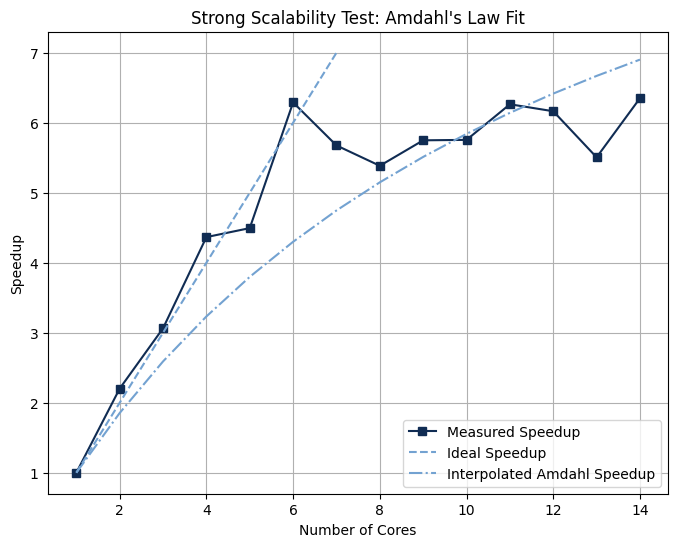

In [5]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def amdahl(N, P):
    """Amdahl's Law function."""
    return 1 / ((1 - P) + P / N)

def estimate_parallel_fraction(cores, execution_times):
    """Estimate the parallel fraction P using Amdahl's Law."""
    # Compute speedup
    speedup = execution_times[0] / execution_times
    
    # Define error function for optimization
    def error_func(P):
        return np.sum((amdahl(cores, P) - speedup) ** 2)
    
    # Optimize for P
    P_opt = opt.minimize_scalar(error_func, bounds=(0, 1), method='bounded').x
    
    # Compute estimated speedup using the fitted P
    S_estimated = amdahl(cores, P_opt)
    
    return P_opt, S_estimated, speedup

def plot_results(cores, speedup, S_estimated):
    """Plot actual vs estimated speedup."""
    plt.figure(figsize=(8, 6))
    plt.plot(cores, speedup, marker='s', linestyle='-', color='#102C53', label='Measured Speedup')
    plt.plot(cores[0:7], cores[0:7], linestyle='--', color='#73A2D1', label='Ideal Speedup')  # Ideal linear speedup
    
    # Compute theoretical speedup curve
    theoretical_speedup_curve = np.array([amdahl(N, P_opt) for N in cores])
    plt.plot(cores, theoretical_speedup_curve, linestyle='-.', color='#73A2D1', label='Interpolated Amdahl Speedup')
    
    plt.xlabel('Number of Cores')
    plt.ylabel('Speedup')
    plt.title("Strong Scalability Test: Amdahl's Law Fit")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Given data
    cores = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
    execution_times = np.array([
        4.52154, 2.05317, 1.47584, 1.03565, 1.00601, 0.718886,
        0.796677, 0.839686, 0.78654, 0.785686, 0.721863, 0.733553,
        0.821222, 0.712032
    ]) 
    """execution_times = np.array([
        7.18702, 4.75227, 3.46536, 2.64444, 2.24207, 1.94719, 1.76675, 1.50614, 1.68177, 1.60631, 1.83596, 1.69754, 1.89851, 1.84226
    ]) """
    
    # Estimate parallel fraction and speedup
    P_opt, S_estimated, speedup = estimate_parallel_fraction(cores, execution_times)
    
    # Display results
    print(f"Estimated Parallel Fraction (P): {P_opt:.4f}")
    print("Estimated Speedup:")
    for c, s in zip(cores, S_estimated):
        print(f"Cores: {c}, Speedup: {s:.4f}")
    
    # Plot results
    plot_results(cores, speedup, S_estimated)


Estimated Parallel Fraction (P): 0.8691
Estimated Speedup:
Cores: 1, Speedup: 1.0000
Cores: 2, Speedup: 1.7684
Cores: 3, Speedup: 2.3774
Cores: 4, Speedup: 2.8718
Cores: 5, Speedup: 3.2813
Cores: 6, Speedup: 3.6260
Cores: 7, Speedup: 3.9201
Cores: 8, Speedup: 4.1740
Cores: 9, Speedup: 4.3955
Cores: 10, Speedup: 4.5903
Cores: 11, Speedup: 4.7631
Cores: 12, Speedup: 4.9172
Cores: 13, Speedup: 5.0557
Cores: 14, Speedup: 5.1808
Cores: 15, Speedup: 5.2943
Cores: 16, Speedup: 5.3978
Cores: 17, Speedup: 5.4925
Cores: 18, Speedup: 5.5796
Cores: 19, Speedup: 5.6598
Cores: 20, Speedup: 5.7340


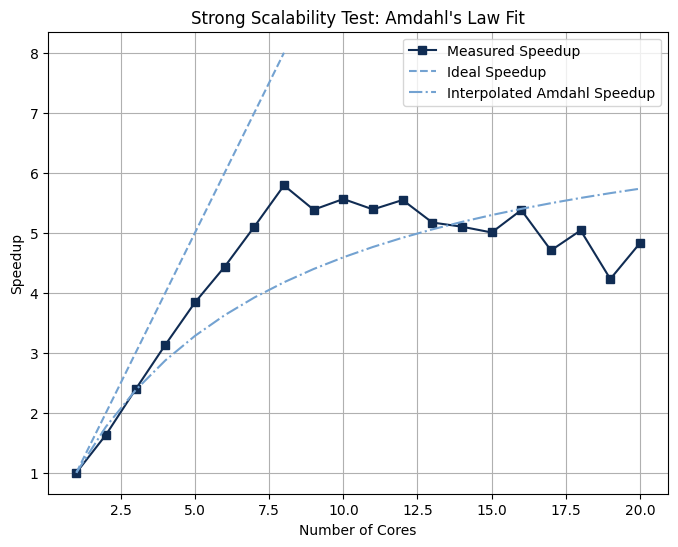

In [9]:
#STRONG SCALABILITY 100X100X100 LOGIN02

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def amdahl(N, P):
    """Amdahl's Law function."""
    return 1 / ((1 - P) + P / N)

def estimate_parallel_fraction(cores, execution_times):
    """Estimate the parallel fraction P using Amdahl's Law."""
    # Compute speedup
    speedup = execution_times[0] / execution_times
    
    # Define error function for optimization
    def error_func(P):
        return np.sum((amdahl(cores, P) - speedup) ** 2)
    
    # Optimize for P
    P_opt = opt.minimize_scalar(error_func, bounds=(0, 1), method='bounded').x
    
    # Compute estimated speedup using the fitted P
    S_estimated = amdahl(cores, P_opt)
    
    return P_opt, S_estimated, speedup

def plot_results(cores, speedup, S_estimated, P_opt):
    """Plot actual vs estimated speedup."""
    plt.figure(figsize=(8, 6))
    plt.plot(cores, speedup, marker='s', linestyle='-', color='#102C53', label='Measured Speedup')
    plt.plot(cores[0:8], cores[0:8], linestyle='--', color='#73A2D1', label='Ideal Speedup')  # Ideal linear speedup
    
    # Compute theoretical speedup curve
    theoretical_speedup_curve = np.array([amdahl(N, P_opt) for N in cores])
    plt.plot(cores, theoretical_speedup_curve, linestyle='-.', color='#73A2D1', label='Interpolated Amdahl Speedup')
    
    plt.xlabel('Number of Cores')
    plt.ylabel('Speedup')
    plt.title("Strong Scalability Test: Amdahl's Law Fit")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Given data
    cores = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
    execution_times = np.array([
        75.7499, 46.3853, 31.669, 24.1886, 19.7347, 17.089, 14.8524, 13.0864, 14.0709, 13.6192,
        14.0573, 13.6593, 14.6517, 14.8521, 15.1381, 14.0853, 16.1003, 15.0325, 17.9127, 15.6943,
    ])
    
    # Estimate parallel fraction and speedup
    P_opt, S_estimated, speedup = estimate_parallel_fraction(cores, execution_times)
    
    # Display results
    print(f"Estimated Parallel Fraction (P): {P_opt:.4f}")
    print("Estimated Speedup:")
    for c, s in zip(cores, S_estimated):
        print(f"Cores: {c}, Speedup: {s:.4f}")
    
    # Plot results
    plot_results(cores, speedup, S_estimated, P_opt)


Estimated Parallel Fraction (P): 0.8319
Estimated Speedup:
Cores: 1, Speedup: 1.0000
Cores: 2, Speedup: 1.7122
Cores: 3, Speedup: 2.2452
Cores: 4, Speedup: 2.6590
Cores: 5, Speedup: 2.9897
Cores: 6, Speedup: 3.2600
Cores: 7, Speedup: 3.4850
Cores: 8, Speedup: 3.6753
Cores: 9, Speedup: 3.8383
Cores: 10, Speedup: 3.9795
Cores: 11, Speedup: 4.1029
Cores: 12, Speedup: 4.2118
Cores: 13, Speedup: 4.3086
Cores: 14, Speedup: 4.3952
Cores: 15, Speedup: 4.4731
Cores: 16, Speedup: 4.5435
Cores: 17, Speedup: 4.6075
Cores: 18, Speedup: 4.6660
Cores: 19, Speedup: 4.7195
Cores: 20, Speedup: 4.7688
Cores: 21, Speedup: 4.8143
Cores: 22, Speedup: 4.8564
Cores: 23, Speedup: 4.8955
Cores: 24, Speedup: 4.9319
Cores: 25, Speedup: 4.9658
Cores: 26, Speedup: 4.9976
Cores: 27, Speedup: 5.0274
Cores: 28, Speedup: 5.0553
Cores: 29, Speedup: 5.0816
Cores: 30, Speedup: 5.1065


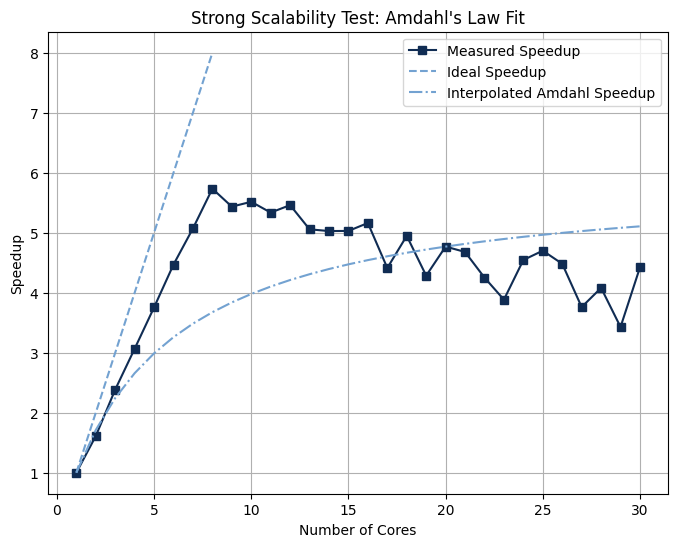

In [5]:
#STRONG SCALABILITY 150x150x150 LOGIN02

import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def amdahl(N, P):
    """Amdahl's Law function."""
    return 1 / ((1 - P) + P / N)

def estimate_parallel_fraction(cores, execution_times):
    """Estimate the parallel fraction P using Amdahl's Law."""
    # Compute speedup
    speedup = execution_times[0] / execution_times
    
    # Define error function for optimization
    def error_func(P):
        return np.sum((amdahl(cores, P) - speedup) ** 2)
    
    # Optimize for P
    P_opt = opt.minimize_scalar(error_func, bounds=(0, 1), method='bounded').x
    
    # Compute estimated speedup using the fitted P
    S_estimated = amdahl(cores, P_opt)
    
    return P_opt, S_estimated, speedup

def plot_results(cores, speedup, S_estimated, P_opt):
    """Plot actual vs estimated speedup."""
    plt.figure(figsize=(8, 6))
    plt.plot(cores, speedup, marker='s', linestyle='-', color='#102C53', label='Measured Speedup')
    plt.plot(cores[0:8], cores[0:8], linestyle='--', color='#73A2D1', label='Ideal Speedup')  # Ideal linear speedup
    
    # Compute theoretical speedup curve
    theoretical_speedup_curve = np.array([amdahl(N, P_opt) for N in cores])
    plt.plot(cores, theoretical_speedup_curve, linestyle='-.', color='#73A2D1', label='Interpolated Amdahl Speedup')
    
    plt.xlabel('Number of Cores')
    plt.ylabel('Speedup')
    plt.title("Strong Scalability Test: Amdahl's Law Fit")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Given data
    cores = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])
    execution_times = np.array([
        39.6274, 24.6033, 16.6117, 12.9248, 10.5503, 8.86571, 7.81322, 6.91209, 7.29168, 7.18451,
        7.42694, 7.25763, 7.83643, 7.88188, 7.87808, 7.67702, 8.98131, 8.00929, 9.24902, 8.30968,
        8.46859, 9.32014, 10.2014, 8.71758, 8.43021, 8.84138, 10.537, 9.71102, 11.557, 8.96102,
    ])
    
    # Estimate parallel fraction and speedup
    P_opt, S_estimated, speedup = estimate_parallel_fraction(cores, execution_times)
    
    # Display results
    print(f"Estimated Parallel Fraction (P): {P_opt:.4f}")
    print("Estimated Speedup:")
    for c, s in zip(cores, S_estimated):
        print(f"Cores: {c}, Speedup: {s:.4f}")
    
    # Plot results
    plot_results(cores, speedup, S_estimated, P_opt)


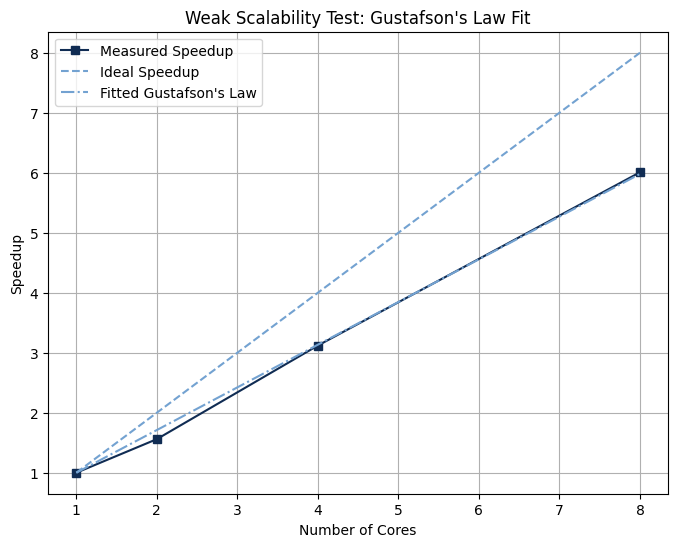

Estimated Serial Fraction (s): 0.2886728813559322
Estimated Parallel Fraction (p): 0.7113271186440677


In [7]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

def gustafson_law(cores, s):
    """Function based on Gustafson's Law to calculate speedup, with p = 1 - s."""
    p = 1 - s  # Since s + p = 1
    return s + p * cores

def estimate_parallel_fraction_and_serial_fraction(cores, speedup):
    """Estimate the serial fraction (s) from the data using Gustafson's Law, with s + p = 1."""
    
    # Define the error function for optimization
    def error_func(s):
        p = 1 - s  # Ensure s + p = 1
        # Calculate the predicted speedup based on Gustafson's Law
        predicted_speedup = gustafson_law(cores, s)
        # Calculate the squared error between actual speedup and predicted speedup
        return np.sum((predicted_speedup - speedup) ** 2)
    
    # Use optimization to find the best s
    result = opt.minimize_scalar(error_func, bounds=(0, 1), method='bounded')
    
    # Extract optimal s
    s_opt = result.x
    p_opt = 1 - s_opt  # Calculate p from s

    # Compute the estimated speedup using the fitted parameters
    estimated_speedup = gustafson_law(cores, s_opt)
    
    return s_opt, p_opt, estimated_speedup

def plot_results(cores, speedup, s_opt, p_opt):
    """Plot actual vs estimated speedup with Gustafson's Law and fitted parameters."""
    plt.figure(figsize=(8, 6))
    
    # Measured Speedup
    plt.plot(cores, speedup, marker='s', linestyle='-', color='#102C53', label='Measured Speedup')

    # Ideal Linear Speedup
    plt.plot(cores, cores, linestyle='--', color='#73A2D1', label='Ideal Speedup')

    # Gustafson's Law Speedup (using fitted s and p)
    gustafson_speedup = gustafson_law(cores, s_opt)
    plt.plot(cores, gustafson_speedup, linestyle='-.', color='#73A2D1', label="Fitted Gustafson's Law")

    # Labels and legend
    plt.xlabel('Number of Cores')
    plt.ylabel('Speedup')
    plt.title("Weak Scalability Test: Gustafson's Law Fit")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    # Given data
    cores = np.array([1, 2, 4, 8])
    speedup = np.array([1, 1.56, 3.12, 6.0069])

    # Estimate serial fraction (s) and parallel fraction (p)
    s_opt, p_opt, estimated_speedup = estimate_parallel_fraction_and_serial_fraction(cores, speedup)

    # Plot results with the estimated parameters
    plot_results(cores, speedup, s_opt, p_opt)

    # Print the estimated values of s and p
    print(f"Estimated Serial Fraction (s): {s_opt}")
    print(f"Estimated Parallel Fraction (p): {p_opt}")

